In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as iplot
import cufflinks as cf
cf.go_offline()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
print(cf.getThemes())
cf.set_config_file(theme='henanigans')

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


In [3]:
ls

 Volume in drive D is Local Disk 
 Volume Serial Number is 407D-3EE5

 Directory of D:\data-science\machine-learning\in7__Clustering

04-11-2022  12:14    <DIR>          .
04-11-2022  12:14    <DIR>          ..
04-11-2022  09:28    <DIR>          .ipynb_checkpoints
04-11-2022  11:42    <DIR>          clustering
23-10-2022  19:15           521,200 dendogram.png
04-11-2022  12:14           213,568 in1__KMeans, DBSCAN.ipynb
25-09-2019  15:36             4,286 Mall_Customers.csv
               3 File(s)        739,054 bytes
               4 Dir(s)  88,160,210,944 bytes free


In [4]:
## Loading the dataset

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='CustomerID', ylabel='Count'>

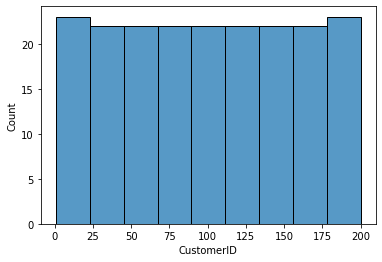

In [5]:
sns.histplot(df.iloc[:, 0])

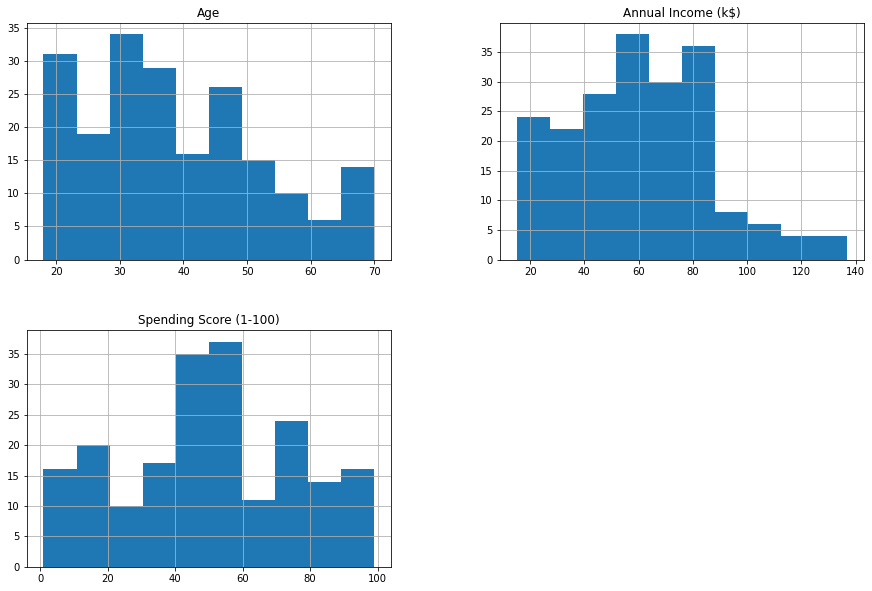

In [6]:
## bird-eye view of the dataset

df.iloc[:, 1:].hist(figsize=(15, 10))
plt.show()

## # KMeans Clustering Algorithm:

### Intution:

- K random points (or centroids) will be generated and each point will pair to its immediate neighbour.
- New cwntroid will be computed according to the number of datapoints in the immediate vicinity of the random generated points. 
- Centroid will shift according to the number of neighbours clubbed altogether each time.
- All k-points will work this way and form their respective clusters and apparently **k clusters** are gonna be formed.

Now to find the cluster for any new datapoint to belong to, **distance from that datapoint to the centroid of each cluster will be computed and it's gonna belong to the cluster nearest to it in the manner of distance**.
<br><br>
But all things revolve around the number of clusters to be formed and hence the number of points to be generated i.e. k and thus **OPTIMAL VALUE OF `K` IS TO BE FOUND**, which is to be computed using plotting the `Elbow plot` using **WCSS (Inertia)** and possible values of k and finding the dispersal point.

In [7]:
### Picking the features basedon which clusters are to be formed

X = df.iloc[:, 3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
import warnings

warnings.filterwarnings('ignore')

In [9]:
## Let's hyper tune the `K` by computing the `Inertia`

wcss = [] # inertia
for i in range(1, 15):
    mod = KMeans(n_clusters=i, random_state=30)
    mod.fit(X)
    wcss.append(mod.inertia_)
    
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25311.63315295815,
 21850.165282585633,
 19641.456216651568,
 17887.084456628647,
 15990.444512350397,
 14666.175194043304,
 12797.180630643867]

Text(0, 0.5, 'wcss ----------------------->')

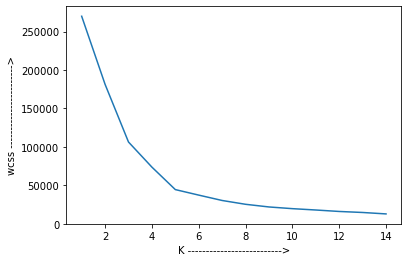

In [10]:
plt.figure()
sns.lineplot(x=range(1, 15), y=wcss)
plt.xlabel("K -------------------------->")
plt.ylabel("wcss ----------------------->")

### It can be interpreted that k=6 is our optimal val for k. Thus, 6 clusters are to be formed.

In [11]:
km_mod = KMeans(n_clusters=6, random_state=30)
clusters_class = km_mod.fit_predict(X)
clusters_class

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 5, 1, 5, 2, 5, 2, 5,
       1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [12]:
X["Cluster Class"] = clusters_class
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster Class
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


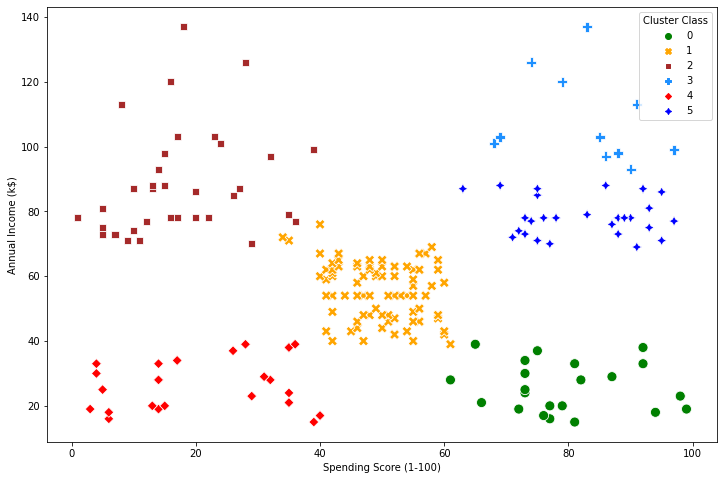

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x="Spending Score (1-100)", y="Annual Income (k$)", hue="Cluster Class", style="Cluster Class",
               palette=['green','orange','brown','dodgerblue','red', 'blue'], s=100)
plt.show()

In [35]:
## Visualizing clusters

import plotly.express as px


fig = px.scatter(X, x="Spending Score (1-100)", y="Annual Income (k$)", color="Cluster Class")
fig.update_traces(marker=dict(size=15,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [57]:
## Visualizing clusters in 3D

import plotly.express as px

fig = px.scatter_3d(X, x="Spending Score (1-100)", y="Annual Income (k$)", z="Cluster Class", color="Cluster Class")
fig.update_traces(marker=dict(size=8))
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers')))
fig.show()

In [15]:
### data belonging to the cluster_4

X[X["Cluster Class"] == 4]

,Annual Income (k$),Spending Score (1-100),Cluster Class
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


## # MiniBatchKMeans:

The MiniBatchKMeans is a variant of the KMeans algorithm which **uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function.** 
- Mini-batches are subsets of the input data, randomly sampled in each training iteration. 
- These mini-batches drastically reduce the amount of computation required to converge to a local solution. 
- In contrast to other algorithms that reduce the convergence time of k-means, **mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.**

### The algorithm iterates between two major steps, similar to vanilla k-means. 
- ### In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. 
- ### In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. 
- ### For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. 
- ### This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

In [16]:
features = df.iloc[:, 3:]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
mini_mod = MiniBatchKMeans(n_clusters=6)
mini_mod.fit(features)

MiniBatchKMeans(n_clusters=6)

# # DBSCAN:

**Density Based Spatial Clustering of Application Noise**

In [18]:
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [19]:
### building the DBSCAN model

dbs_mod = DBSCAN(eps=1,
    min_samples=3,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None)

dbs_mod.fit(features)

DBSCAN(eps=1, min_samples=3)

In [20]:
dbs_mod.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [21]:
### clusters

set(dbs_mod.labels_)

{-1, 0, 1, 2, 3, 4, 5}

### There are total 6 clusters formed and -1 represents the noise (outliers).

### # Evaluation:

Let's assume the clusters discerned by the KMeans is our ground truth.

In [22]:
X

,Annual Income (k$),Spending Score (1-100),Cluster Class
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [23]:
## Ground Truth

ground_truth = X['Cluster Class']
ground_truth

0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    2
197    3
198    2
199    3
Name: Cluster Class, Length: 200, dtype: int32

In [24]:
label_pred = dbs_mod.labels_
label_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### # Adjusted Random Score:

In [25]:
### Adjusted Random Score:

metrics.adjusted_rand_score(ground_truth, label_pred)

-0.06049472070524322

### # Jaccard Score:

In [26]:
### Jaccard score

metrics.jaccard_score(ground_truth, label_pred, average="macro")

0.020597127739984882

In [27]:
label_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [28]:
np.array(ground_truth).reshape(-1, 1)

label_pred.reshape(-1, 1)

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [-1],
       [ 0],
       [-1],
       [-1],
       [ 0],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 2],
       [ 2],

### # Silhoutte Score:

In [29]:
### Silhoutte Score

metrics.silhouette_score(np.array(ground_truth).reshape(-1, 1), label_pred.reshape(-1, 1))

-0.5814443959727466

### # Let's hypertune the params:

In [30]:
grid_params = {"epsilon": np.arange(0.1, 1.5, .1),
              "min_samples": [3, 4, 5]
              }
grid_params

{'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4]),
 'min_samples': [3, 4, 5]}

In [31]:
### Implementing GrisSearchCV

mod_cv = GridSearchCV(dbs_mod, param_grid=grid_params)
mod_cv.fit(features)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator DBSCAN(eps=1, min_samples=3) does not.

### This demonstrates that `Cross Validation` is not applicable to the clustering algorithms.

## # DataLeakage:

- In general terms, **Data Leakage** refers to sharing secured data with an unauthorized user.
- And in machine learning terms, sometimes there are some common records in train and test dataset causing the testing to be biased, something that is referred to as **Data leakage**.

### In other words, if there are some records of testing data made available (intentionally or not) to the training set <br><br>causing the major bias in a model would refer to something known as `Data Leakage`.

### Example: 

One instance of data leakage would be if one does standar scales the whole data before splitting the data into training and testing data, that would mean there are some common things in between test and train data and the model would not have the exposure to deal with an entirely new data thus creating a major bias in its prediction power. 